### Question – 1 (Using Python)

**3. For the variant Y, which of the two product families show better process control? How will you visualize this?**

***Answer***

Analysing of ***height*** and ***weight*** measurements has been conducted for variant Y families,  LIF001_Y and LIF002_Y, to evaluate process control for variant Y.

1. First, a comparative analysis was conducted between the two product families of variant Y using ***height*** measurements. The results were presented through:
    1. Comparing the  percentage of ***T_Height*** occurrences within LSL and USL.
    2. Visualize ***T_Height*** Usning control chart.
2. Second, a comparative analysis was conducted between the two product families of variant Y using ***weight*** measurements. The results were presented through:
    1. Comparing the  percentage of ***T_Weight*** occurrences within LSL and USL 
    2. Visualize ***T_Weight*** Usning control chart

The following lines of code are responsible for reading data from the provided sheets, creating essential functions, and configuring variables to set the stage for subsequent lines of code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
################################################################################################################
# Read measurements and specifications from input data file
measurements_data = pd.read_excel('../data/question_1_2.xlsx', sheet_name='Measurements', skiprows=1)
specifications_data = pd.read_excel('../data/question_1_2.xlsx', sheet_name='Specifications', skiprows=1)
################################################################################################################
# Return USL and LSL for the given product and measurement
def specifications_limits(product_code, measurement_name):
    product_spec = specifications_data[(specifications_data['Product Code'] == product_code) & (specifications_data['T_Name'].str.lower() == measurement_name.lower() )]
    return product_spec['USL'].values[0], product_spec['LSL'].values[0]
################################################################################################################
# Return control chart for the given groups according to the given measurement and sample IDs
def control_chart_plot(sample_ids_name, measurement_name, groups):
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    for i, items in enumerate(groups):
        # Calculate upper and lower control limits
        key, data = items['key'], items['data']
        ucl, lcl = specifications_limits(items['key'], measurement_name)
        ax[i].plot(data[sample_ids_name], data[measurement_name], label=f"Actual {measurement_name}", marker='o')
        ax[i].axhline(ucl, color='r', linestyle='--', label=f"{measurement_name} USL")
        ax[i].axhline(lcl, color='g', linestyle='--', label=f"{measurement_name} LSL")

        ax[i].set_title(f'{key} - {measurement_name}')
        ax[i].set_xlabel(sample_ids_name.title())
        ax[i].set_ylabel(measurement_name)
        ax[i].legend()

    plt.tight_layout()
    return plt

#################################################################################################
# Calculates the percentage of given measurement (height or weight) within the specified LSL and USL for 
# two different variant families: 'LIF001_Y' and 'LIF002_Y'. 
# The goal is to compare their process control.
def within_limits_percentage(measurement, vrnt_fmly1, vrnt_fmly2, vrnt_fmly1_data, vrnt_fmly2_data):
    # Percentage of measurement (Height or Weight) Within usl and lsl for variant family 1 (LIF001_Y)
    ucl, lcl = specifications_limits(vrnt_fmly1, measurement)
    vrnt1_within_limit = vrnt_fmly1_data[(vrnt_fmly1_data[measurement] >= lcl) & (vrnt_fmly1_data[measurement] <= ucl)]
    vrnt1_within_limit_percentage = vrnt1_within_limit.shape[0] / vrnt_fmly1_data.shape[0] * 100

    # Percentage of measurement (Height or Weight) Within usl and lsl for variant family 1 (LIF001_Y)
    ucl, lcl = specifications_limits(vrnt_fmly2, measurement)
    vrnt2_within_limit = vrnt_fmly2_data[(vrnt_fmly2_data[measurement] >= lcl) & (vrnt_fmly2_data[measurement] <= ucl)]
    vrnt2_within_limit_percentage = vrnt2_within_limit.shape[0] / vrnt_fmly2_data.shape[0] * 100

    compareson = pd.DataFrame({
        'Product Y Family': ['LIF001_Y', 'LIF002_Y'],
        'Count': [vrnt_fmly1_data.shape[0], vrnt_fmly2_data.shape[0]],
        'Within Limits Count': [vrnt1_within_limit.shape[0], vrnt2_within_limit.shape[0]],
        'Within Limits Precentage': [vrnt1_within_limit_percentage, vrnt2_within_limit_percentage]
        })

    print(f"""
    This table presents a comparative analysis of Variant Y families, focusing on the percentage of 
    {measurement} measurements falling within LSL and USL limits.
    """)
    print(compareson)
    if vrnt1_within_limit_percentage > vrnt2_within_limit_percentage:
        print(f"""
    The table data shows that {vrnt_fmly1} has better process control than {vrnt_fmly2}, with {vrnt1_within_limit_percentage}% compliance 
    compared to {vrnt2_within_limit_percentage}% for {measurement} measurements within the specified LSL and USL
        """)    
    elif vrnt1_within_limit_percentage == vrnt2_within_limit_percentage:
        print(f"""
    The table data shows that {vrnt_fmly1} and {vrnt_fmly2} have equal process control with identical percentages of 
    {measurement} measurements within the specified LSL and USL
        """)
    else:
        print(f"""
    The table data shows that {vrnt_fmly2} has better process control than {vrnt_fmly1}, with {vrnt2_within_limit_percentage}% compliance 
    compared to {vrnt1_within_limit_percentage}% for {measurement} measurements within the specified LSL and USL
        """)

################################################################################################################
lif001_y_measurements = measurements_data[measurements_data['Product Code'] == 'LIF001_Y']
lif002_y_measurements = measurements_data[measurements_data['Product Code'] == 'LIF002_Y']
groups = [{ 'key': 'LIF001_Y','data': lif001_y_measurements },{'key': 'LIF002_Y', 'data': lif002_y_measurements}]
################################################################################################################


Building on the previous code, this below code calculates and compares the percentage of ***Height*** measurements falling within the specified LSL and USL for two different variant families, 'LIF001_Y' and 'LIF002_Y'.

In [2]:
# Note: Ensure previous code cells have been executed...

within_limits_percentage('T_Height', 'LIF001_Y', 'LIF002_Y', lif001_y_measurements, lif002_y_measurements)


    This table presents a comparative analysis of Variant Y families, focusing on the percentage of 
    T_Height measurements falling within LSL and USL limits.
    
  Product Y Family  Count  Within Limits Count  Within Limits Precentage
0         LIF001_Y      4                    1                      25.0
1         LIF002_Y      4                    4                     100.0

    The table data shows that LIF002_Y has better process control than LIF001_Y, with 100.0% compliance 
    compared to 25.0% for T_Height measurements within the specified LSL and USL
        


Building on the previous code, this following code generates a control chart for ***Height***, providing a visual representation of process control for both LIF001_Y and LIF002_Y.

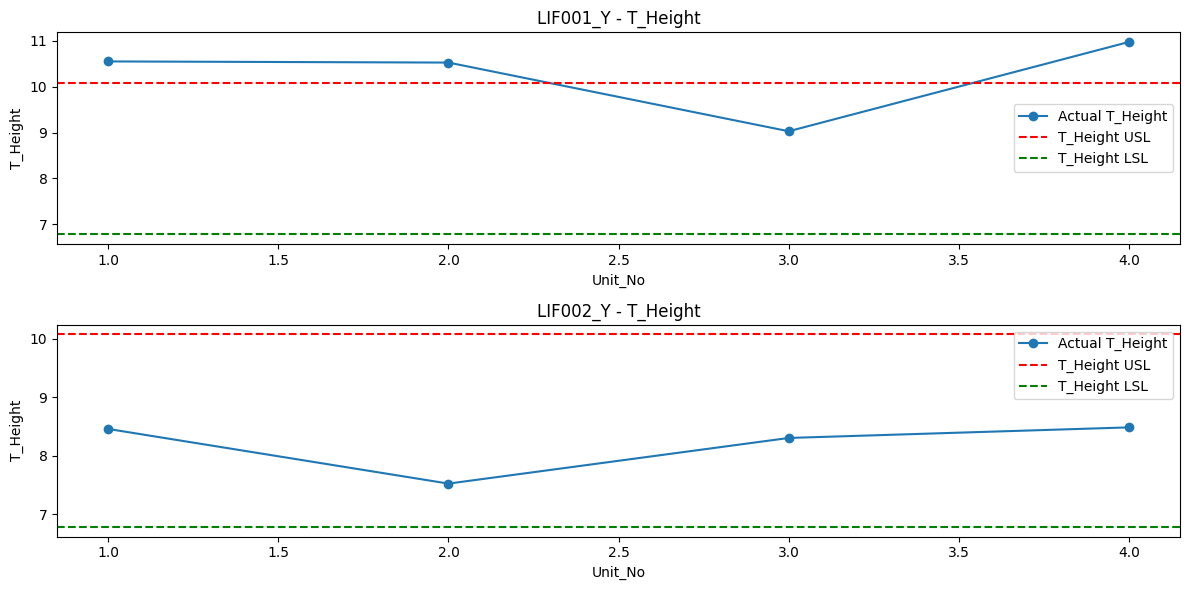

In [31]:
# Note: Ensure previous code cells have been executed...

height_control_chart =  control_chart_plot('Unit_No', 'T_Height', groups)
# height_control_chart.show()
height_control_chart.savefig('../output/question_1_3_height.png', bbox_inches='tight')

Building on the previous code, this code calculates and compares the percentage of ***Weight*** measurements falling within the specified LSL and USL for two different variant families, 'LIF001_Y' and 'LIF002_Y'.

In [32]:
# Note: Ensure previous code cells have been executed...

within_limits_percentage('T_Weight', 'LIF001_Y', 'LIF002_Y', lif001_y_measurements, lif002_y_measurements)


    This table presents a comparative analysis of Variant Y families, focusing on the percentage of 
    T_Weight measurements falling within LSL and USL limits.
    
  Product Y Family  Count  Within Limits Count  Within Limits Precentage
0         LIF001_Y      4                    4                     100.0
1         LIF002_Y      4                    0                       0.0

    The table data shows that LIF001_Y has better process control than LIF002_Y, with 100.0% compliance 
    compared to 0.0% for T_Weight measurements within the specified LSL and USL
        


Building on the previous code, this code generates a control chart for T_Weight, providing a visual representation of process control for both LIF001_Y and LIF002_Y.

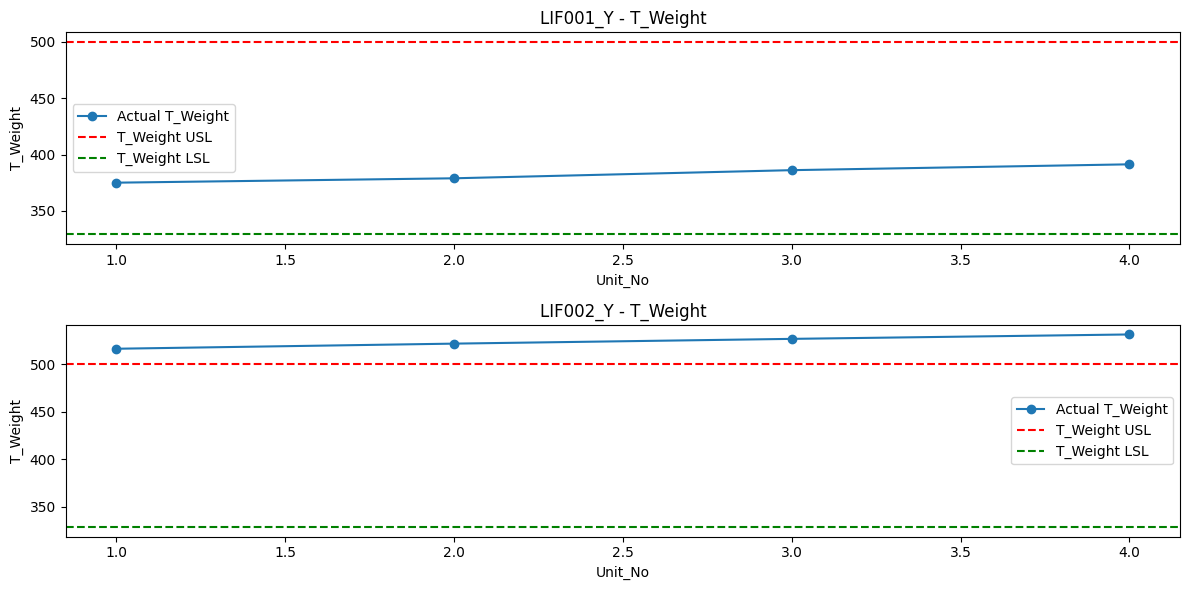

In [33]:
# Note: Ensure previous code cells have been executed...

weight_control_chart =  control_chart_plot('Unit_No', 'T_Weight', groups)
# weight_control_chart.show()
weight_control_chart.savefig('../output/question_1_3_weight.png', bbox_inches='tight')